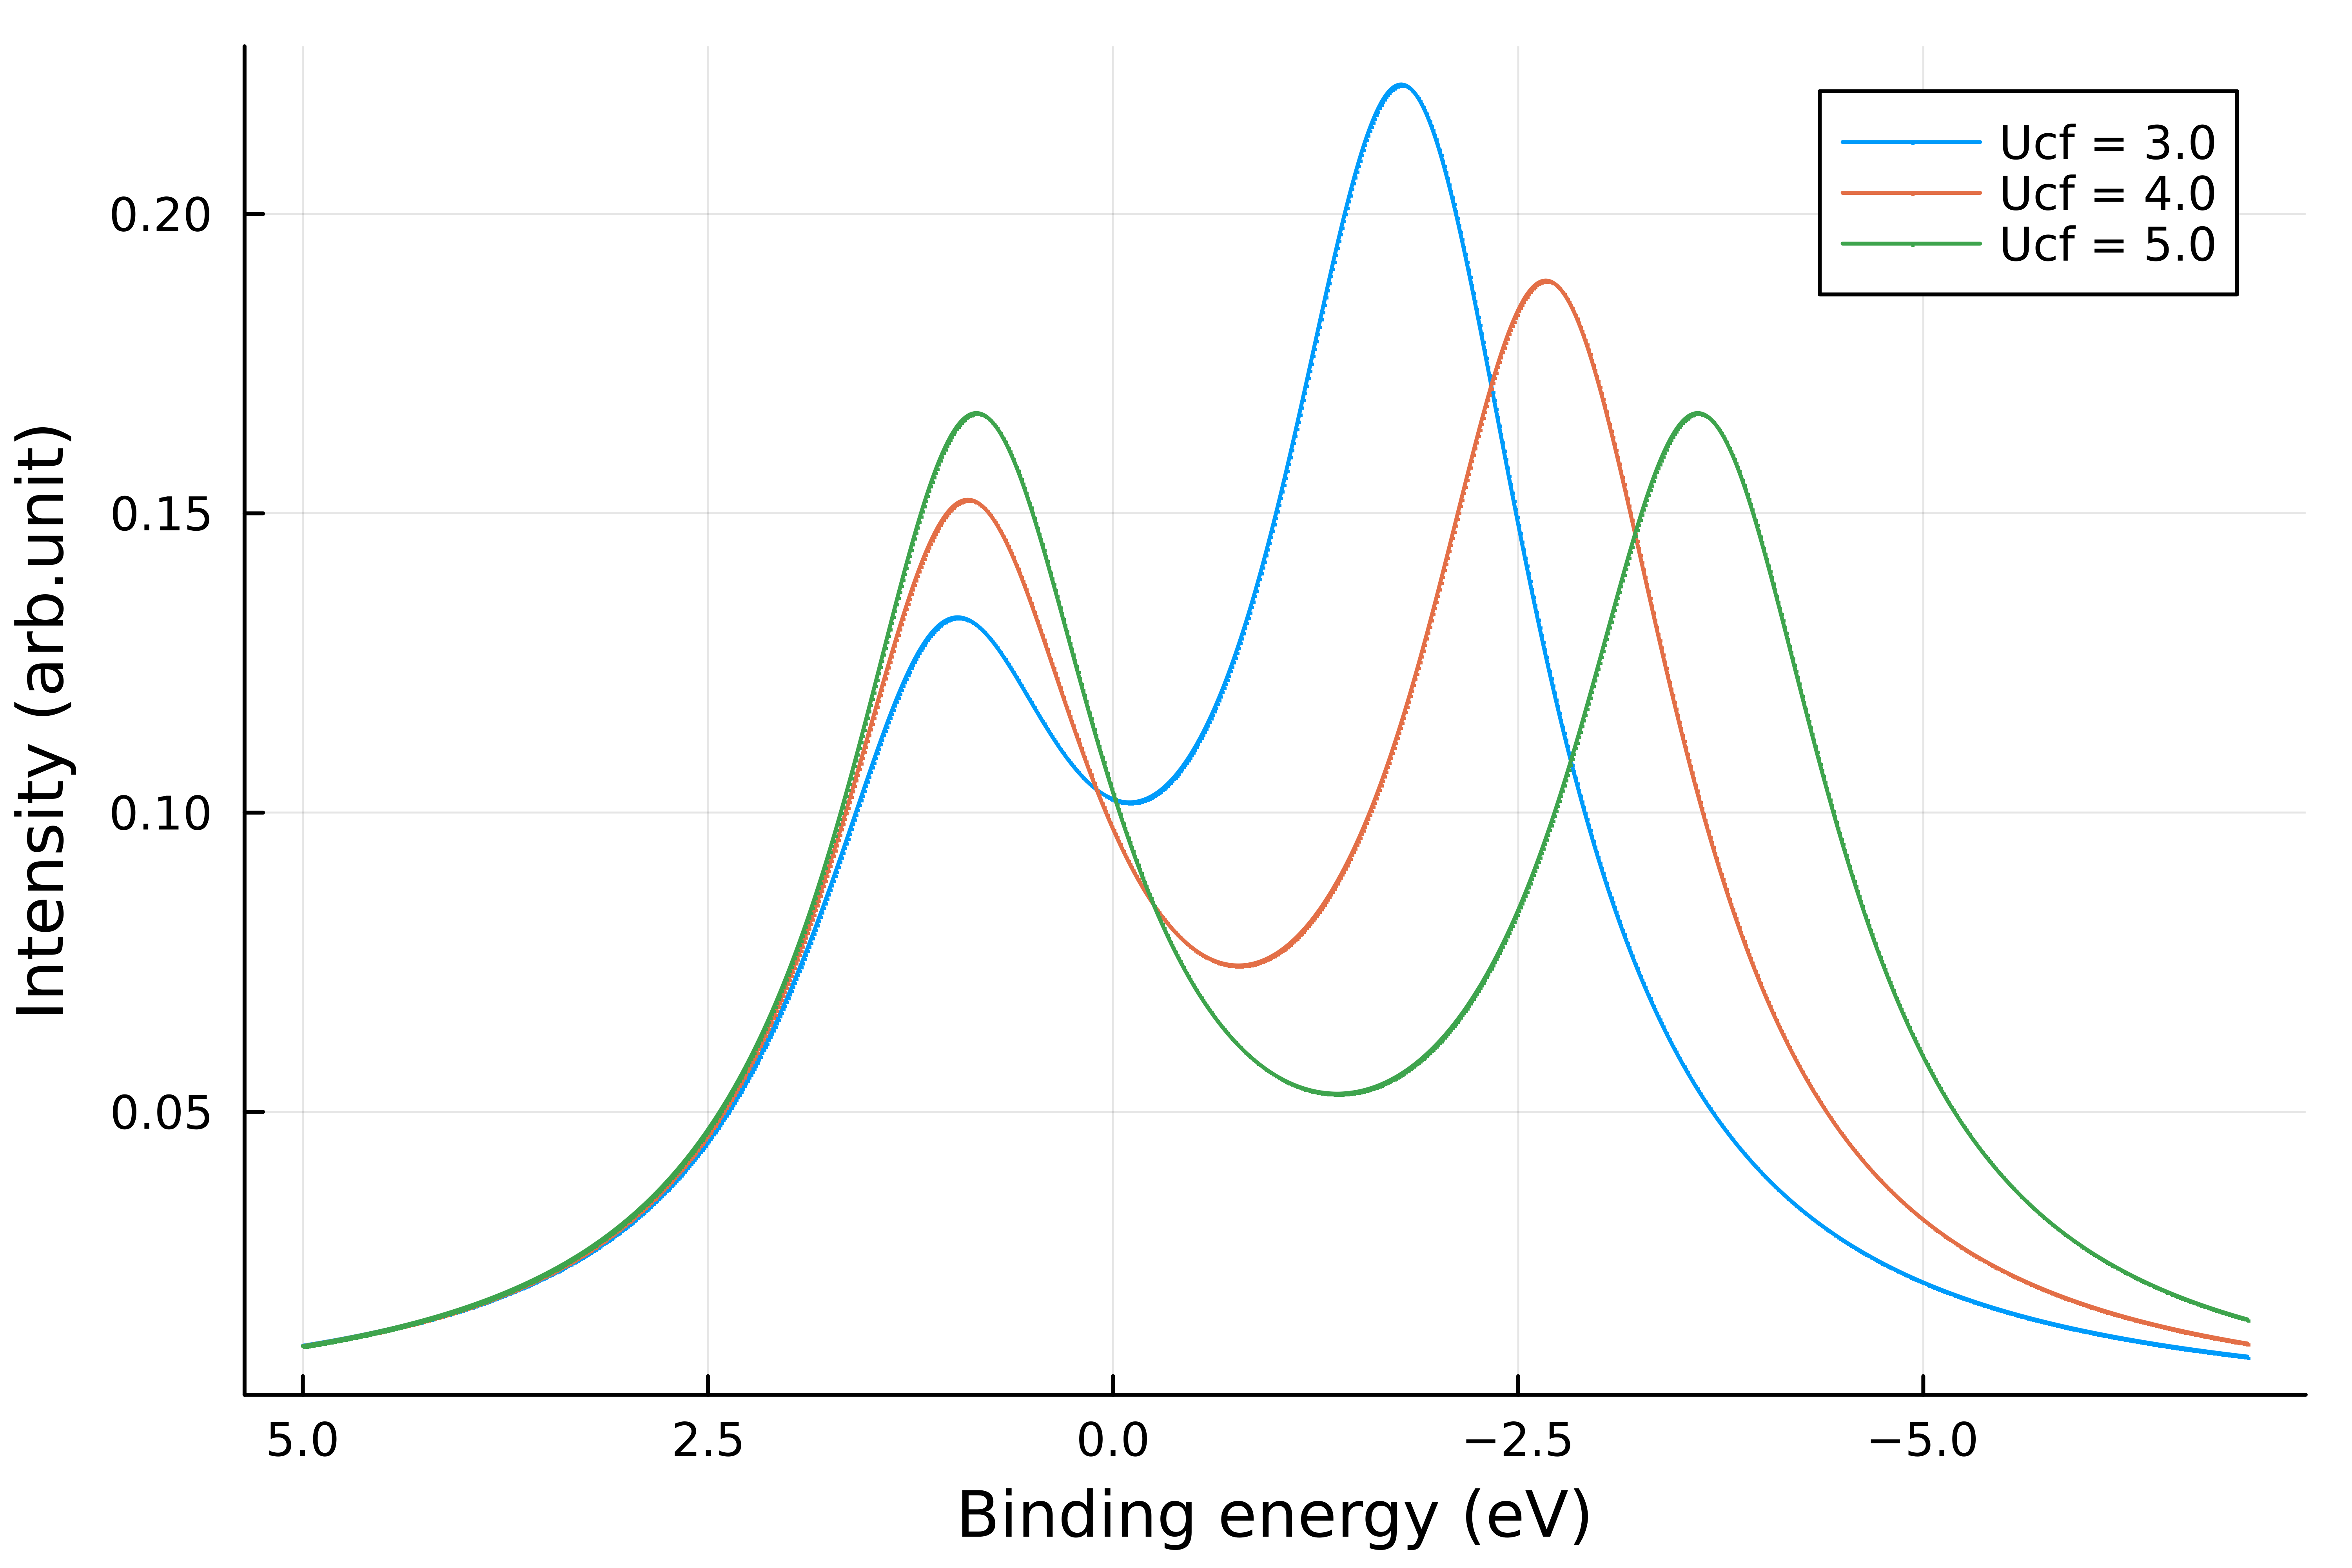

In [2]:
#UGa2
using LinearAlgebra
using Plots
using DelimitedFiles
t =  1 
delta = 1  
Ucf_values = [3.0,4.0,5.0] 
smalldelta = 1   

p = plot(dpi=1000)

for Ucf in Ucf_values

Hg =  [ 0 t
        t delta ]
Hf =  [ 0 t
        t delta - Ucf  ]

Eg,Vg = eigen(Hg)
Ef,Vf = eigen(Hf)

function F1(Eg,Vg,Ef,Vf,Eb)
   return ((abs(dot(Vg[:,1],Vf[:,1])))^2)/(Eb+Eg-Ef+im*smalldelta)
end
function F2(Eg,Vg,Ef,Vf,Eb)
   return ((abs(dot(Vg[:,1],Vf[:,2])))^2)/(Eb+Eg-Ef+im*smalldelta)
end

data = []

for Eb in -7:0.01:5
    ints = (-1 / π) * imag(F1(Eg[1], Vg, Ef[1], Vf, Eb) + F2(Eg[1], Vg, Ef[2], Vf, Eb))
    push!(data, [Eb, ints])
end

data = hcat(data...)
x = data[1, :]
y = data[2, :]

plot!(p, x, y, xlabel="Binding energy (eV)", ylabel="Intensity (arb.unit)", label="Ucf = $Ucf", marker=:auto, markersize=0 ) #ylims=(0, 1))

end

xflip!()

In [3]:
Hg =  [ 0 t
        t delta ]

Eg,Vg = eigen(Hg)

alpha2 = (Vg[1])^2
beta2 = (Vg[2])^2

@show alpha2 , beta2

(alpha2, beta2) = (0.7236067977499788, 0.2763932022500209)


(0.7236067977499788, 0.2763932022500209)